In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

import sys
sys.path.append("../")

import utils_ML as uml

In [7]:
data = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_analysis/PEMatrix/quantile_norm_NSAF_50.csv", index_col = "assay_id")
meta = pd.read_csv("../../../Metadata/unified_metadata.csv")
meta = meta[meta.assay_id.isin(data.index)]

groups = pd.read_csv("../../../Metadata/group_cells_annotation.csv", sep =";", index_col="Unnamed: 0")
meta["Group"] = meta.cell_line.apply(lambda x: groups[groups.cell_line == x]["group"].values[0])
meta = meta.set_index("assay_id")

data.sort_index(inplace=True)
meta.sort_index(inplace=True)

target_encoder = LabelEncoder()
targets = target_encoder.fit_transform(meta.Group)
unique_labels = pd.Series(targets).unique()

In [29]:
def generate_cm(cm):
    """Present this function with the cell in the dataframe containing the confusion matrix"""
    parsed = [" "]
    for x in cm:
        try:
            int(x)
            parsed.append(x)
        except:
            if x == " ":
                if parsed[-1] == " ":
                    continue
                parsed.append(x)
    parsed = ''.join(parsed).split(" ")[1:]

    cm = []
    row = []
    count = 0
    for x in parsed:
        row.append(int(x))
        count += 1
        if count == 15:
            count = 0
            cm.append(row)
            row = []
    
    cm = pd.DataFrame(cm, columns = target_encoder.inverse_transform(unique_labels), index = target_encoder.inverse_transform(unique_labels))

    plt.figure(figsize=(12,6))
    sns.heatmap(cm, annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("True")

- Macro-f1: average of the f1 scores for each class
- Micro-f1: Micro averaging computes a global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP).
- Weighted-F1: The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s support.

# Normalization and imputation

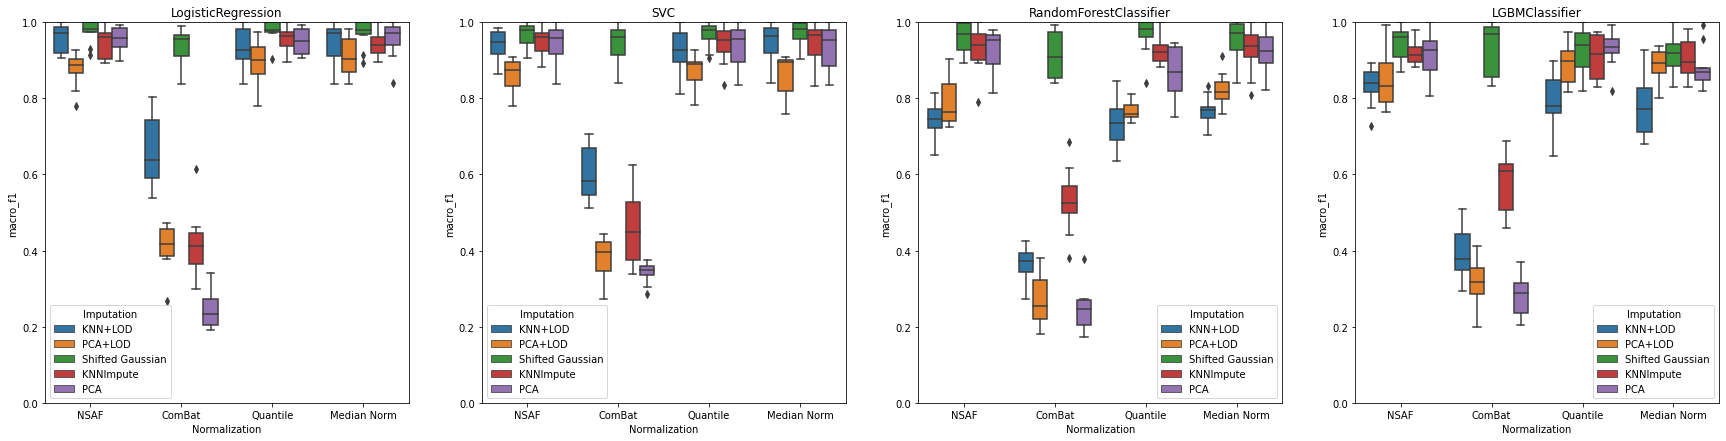

In [3]:
norm_impute_results = pd.read_csv("norm_imputer_evaluation.csv", sep=";")
fig,ax = plt.subplots(1,4,figsize=(30,7))

for i,model in enumerate(norm_impute_results.model.unique()):
    subset = norm_impute_results[norm_impute_results.model == model]
    ax[i].set_title(model)
    ax[i].set_ylim((0,1))
    sns.boxplot(data=subset, x="Normalization", y= "macro_f1", hue="Imputation", ax=ax[i])

In [4]:
norm_impute_results = pd.read_csv("norm_imputer_evaluation_pbkf2.csv", sep=";")


In [5]:
norm_impute_results

,model,fold,micro_f1,macro_f1,weighted_f1,cm,Imputation,Normalization,PXD
0,LogisticRegression,1,1.000000,1.000000,1.000000,[[4]],KNN+LOD,NSAF,PXD000533
1,SVC,1,1.000000,1.000000,1.000000,[[4]],KNN+LOD,NSAF,PXD000533
2,RandomForestClassifier,1,0.500000,0.333333,0.666667,[[2 2]\n [0 0]],KNN+LOD,NSAF,PXD000533
3,LGBMClassifier,1,0.250000,0.133333,0.400000,[[0 0 0]\n [0 0 0]\n [1 2 1]],KNN+LOD,NSAF,PXD000533
4,LogisticRegression,1,0.000000,0.000000,0.000000,[[0 0]\n [4 0]],KNN+LOD,ComBat,PXD000533
...,...,...,...,...,...,...,...,...,...
2795,LGBMClassifier,35,0.333333,0.200000,0.300000,[[0 0 0 0 0 0 0 0 2]\n [0 2 0 0 0 0 0 0 0]\n [...,PCA,Quantile,PXD004452
2796,LogisticRegression,35,1.000000,1.000000,1.000000,[[2 0 0 0 0]\n [0 2 0 0 0]\n [0 0 2 0 0]\n [0 ...,PCA,Median Norm,PXD004452
2797,SVC,35,0.500000,0.480000,0.400000,[[0 2 0 0 0]\n [0 2 0 0 0]\n [0 0 2 0 0]\n [0 ...,PCA,Median Norm,PXD004452
2798,RandomForestClassifier,35,0.583333,0.523016,0.589683,[[1 1 0 0 0 0]\n [0 2 0 0 0 0]\n [0 0 2 0 0 0]...,PCA,Median Norm,PXD004452


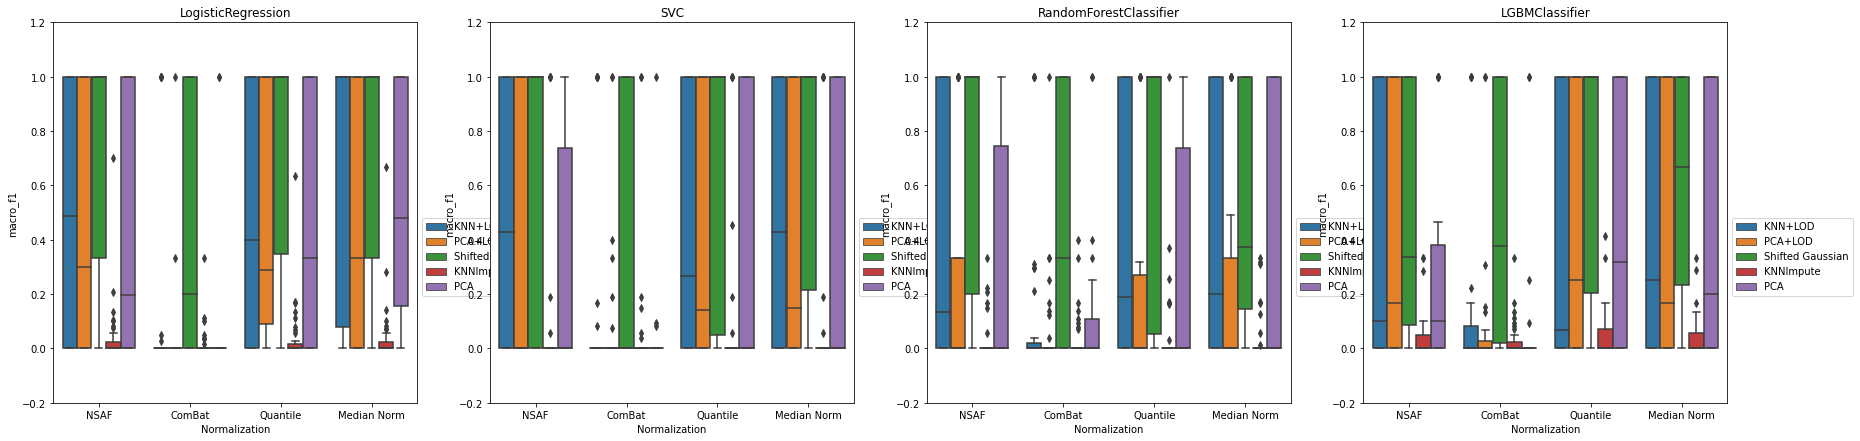

In [4]:
norm_impute_results = pd.read_csv("norm_imputer_evaluation_pbkf2.csv", sep=";")
fig,ax = plt.subplots(1,4,figsize=(30,7))

for i,model in enumerate(norm_impute_results.model.unique()):
    subset = norm_impute_results[norm_impute_results.model == model]
    ax[i].set_title(model)
    ax[i].set_ylim((-0.2,1.2))
    g=sns.boxplot(data=subset, x="Normalization", y= "macro_f1", hue="Imputation", ax=ax[i])
    g.legend(loc='best', bbox_to_anchor=(1, 0.5))

In [ ]:
pxd_fold_map = {}
for i, pxd in enumerate(splitter.taken_PXD):
    pxd_fold_map[i+1] = pxd
norm_impute_results["PXD_accession"] = norm_impute_results.fold.apply(lambda x: pxd_fold_map[x])

In [84]:
norm_impute_results["Imputation"] = norm_impute_results["Imputation"].apply(lambda x: x if x!="Shifted Gaussian" else "LOD")

In [8]:
norm_impute_results[(norm_impute_results.model == "LogisticRegression") & (norm_impute_results.Normalization == "Quantile") &
                    (norm_impute_results.Imputation == "PCA+LOD")]

,model,fold,micro_f1,macro_f1,weighted_f1,cm,Imputation,Normalization,PXD
24,LogisticRegression,1,1.000000,1.000000,1.000000,[[4]],PCA+LOD,Quantile,PXD000533
104,LogisticRegression,2,0.250000,0.200000,0.400000,[[0 0]\n [3 1]],PCA+LOD,Quantile,PXD002842
184,LogisticRegression,3,0.500000,0.333333,0.666667,[[0 0]\n [2 2]],PCA+LOD,Quantile,PXD006035
264,LogisticRegression,4,1.000000,1.000000,1.000000,[[24]],PCA+LOD,Quantile,PXD008719
344,LogisticRegression,5,0.000000,0.000000,0.000000,[[0 0]\n [6 0]],PCA+LOD,Quantile,PXD006591
424,LogisticRegression,6,0.333333,0.250000,0.500000,[[0 0]\n [8 4]],PCA+LOD,Quantile,PXD003406
504,LogisticRegression,7,0.333333,0.250000,0.500000,[[0 0]\n [8 4]],PCA+LOD,Quantile,PXD003407
584,LogisticRegression,8,1.000000,1.000000,1.000000,[[2]],PCA+LOD,Quantile,PXD001327
664,LogisticRegression,9,1.000000,1.000000,1.000000,[[3]],PCA+LOD,Quantile,PXD002057
744,LogisticRegression,10,0.400000,0.250000,0.400000,[[0 0 3 0]\n [0 4 0 0]\n [0 0 0 0]\n [0 0 3 0]],PCA+LOD,Quantile,PXD001352


Order: KNN+LOD, PCA+LOD, SG, KNN, PCA
NSAF combat quantile median

In [17]:
sorted_df = pd.DataFrame()

sorted_df = pd.concat([sorted_df, 
           norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", "Imputation"]).mean().macro_f1["NSAF"]["KNN+LOD, PCA+LOD, Shifted Gaussian, KNNImpute, PCA".split(", ")],
norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", "Imputation"]).mean().macro_f1["ComBat"]["KNN+LOD, PCA+LOD, Shifted Gaussian, KNNImpute, PCA".split(", ")],
norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", "Imputation"]).mean().macro_f1["Quantile"]["KNN+LOD, PCA+LOD, Shifted Gaussian, KNNImpute, PCA".split(", ")],
norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", "Imputation"]).mean().macro_f1["Median Norm"]["KNN+LOD, PCA+LOD, Shifted Gaussian, KNNImpute, PCA".split(", ")]])
sorted_df["Normalisation"] = ["NSAF"]*5 + ["ComBat"]*5 + ["Quantile"]*5 + ["Median Norm"]*5

<AxesSubplot:xlabel='Normalisation'>

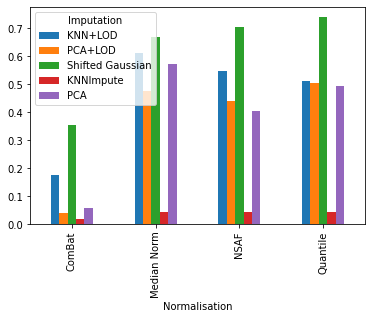

In [35]:
sorted_df.reset_index().rename(columns={"index": "Imputation"}).set_index(["Normalisation", "Imputation"]).unstack()[0]["KNN+LOD, PCA+LOD, Shifted Gaussian, KNNImpute, PCA".split(", ")].plot(kind="bar")

<AxesSubplot:title={'center':'Performance after project split'}, xlabel='Normalisation', ylabel='Mean macro F1-score for 35 projects'>

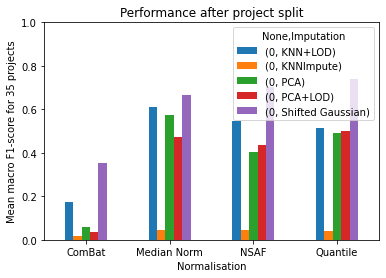

In [22]:
sorted_df.reset_index().rename(columns={"index": "Imputation"}).set_index(["Normalisation", "Imputation"]).unstack().plot(kind="bar",  title="Performance after project split", ylim=(0,1), rot=0,
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation")

In [47]:
norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", 
    "Imputation"]).mean().macro_f1.unstack().loc["NSAF.ComBat.Quantile.Median Norm".split("."), 
        "KNN+LOD, PCA+LOD, Shifted Gaussian, KNNImpute, PCA".split(", ")]

Imputation,KNN+LOD,PCA+LOD,Shifted Gaussian,KNNImpute,PCA
Normalization,,,,,
NSAF,0.545070,0.437765,0.703566,0.043063,0.404044
ComBat,0.173656,0.038095,0.352926,0.019440,0.057143
Quantile,0.511932,0.502410,0.739419,0.041532,0.492320
Median Norm,0.609451,0.473670,0.667998,0.043399,0.572301


Text(0, 0.5, '')

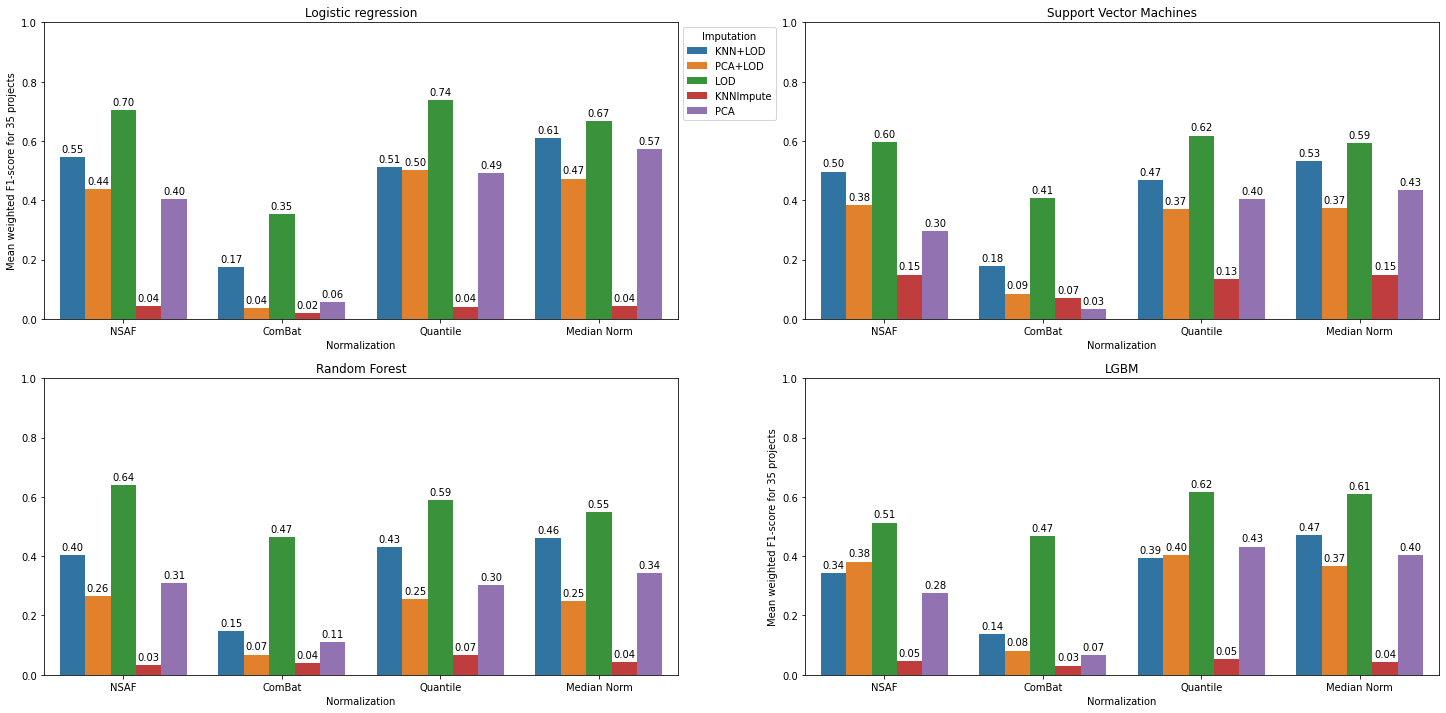

In [86]:
fig, (ax1,ax2)=plt.subplots(2,2, figsize=(25,12))

sns.barplot(data=norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", 
    "Imputation"]).mean().macro_f1.unstack().loc["NSAF.ComBat.Quantile.Median Norm".split("."), 
        "KNN+LOD, PCA+LOD, LOD, KNNImpute, PCA".split(", ")].reset_index().melt(id_vars="Normalization"), y="value",x="Normalization", hue="Imputation",ax=ax1[0])
for p in ax1[0].patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x+w/2, h+w/6)
    text = f'{h:0.2f}'
    ax1[0].annotate(text=text, xy=xy, ha='center', va='center')

sns.barplot(data=norm_impute_results[norm_impute_results.model == "SVC"].groupby(["Normalization", 
    "Imputation"]).mean().macro_f1.unstack().loc["NSAF.ComBat.Quantile.Median Norm".split("."), 
        "KNN+LOD, PCA+LOD, LOD, KNNImpute, PCA".split(", ")].reset_index().melt(id_vars="Normalization"), y="value",x="Normalization", hue="Imputation",ax=ax1[1])
for p in ax1[1].patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x+w/2, h+w/6)
    text = f'{h:0.2f}'
    ax1[1].annotate(text=text, xy=xy, ha='center', va='center')

sns.barplot(data=norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", 
    "Imputation"]).mean().macro_f1.unstack().loc["NSAF.ComBat.Quantile.Median Norm".split("."), 
        "KNN+LOD, PCA+LOD, LOD, KNNImpute, PCA".split(", ")].reset_index().melt(id_vars="Normalization"), y="value",x="Normalization", hue="Imputation",ax=ax2[0])
for p in ax2[0].patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x+w/2, h+w/6)
    text = f'{h:0.2f}'
    ax2[0].annotate(text=text, xy=xy, ha='center', va='center')

sns.barplot(data=norm_impute_results[norm_impute_results.model == "LGBMClassifier"].groupby(["Normalization", 
    "Imputation"]).mean().macro_f1.unstack().loc["NSAF.ComBat.Quantile.Median Norm".split("."), 
        "KNN+LOD, PCA+LOD, LOD, KNNImpute, PCA".split(", ")].reset_index().melt(id_vars="Normalization"), y="value",x="Normalization", hue="Imputation",ax=ax2[1])
for p in ax2[1].patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x+w/2, h+w/6)
    text = f'{h:0.2f}'
    ax2[1].annotate(text=text, xy=xy, ha='center', va='center')

sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
ax1[1].legend_.remove()
ax2[1].legend_.remove()
ax2[0].legend_.remove()

ax1[0].set_ylim((0,1))
ax1[1].set_ylim((0,1))
ax2[1].set_ylim((0,1))
ax2[0].set_ylim((0,1))
ax1[0].set_title("Logistic regression")
ax1[1].set_title("Support Vector Machines")
ax2[0].set_title("Random Forest")
ax2[1].set_title("LGBM")

ax1[0].set_ylabel("Mean weighted F1-score for 35 projects")
ax1[1].set_ylabel("")
ax2[1].set_ylabel("Mean weighted F1-score for 35 projects")
ax2[0].set_ylabel("")

Text(0.5, 1.0, 'LGBM')

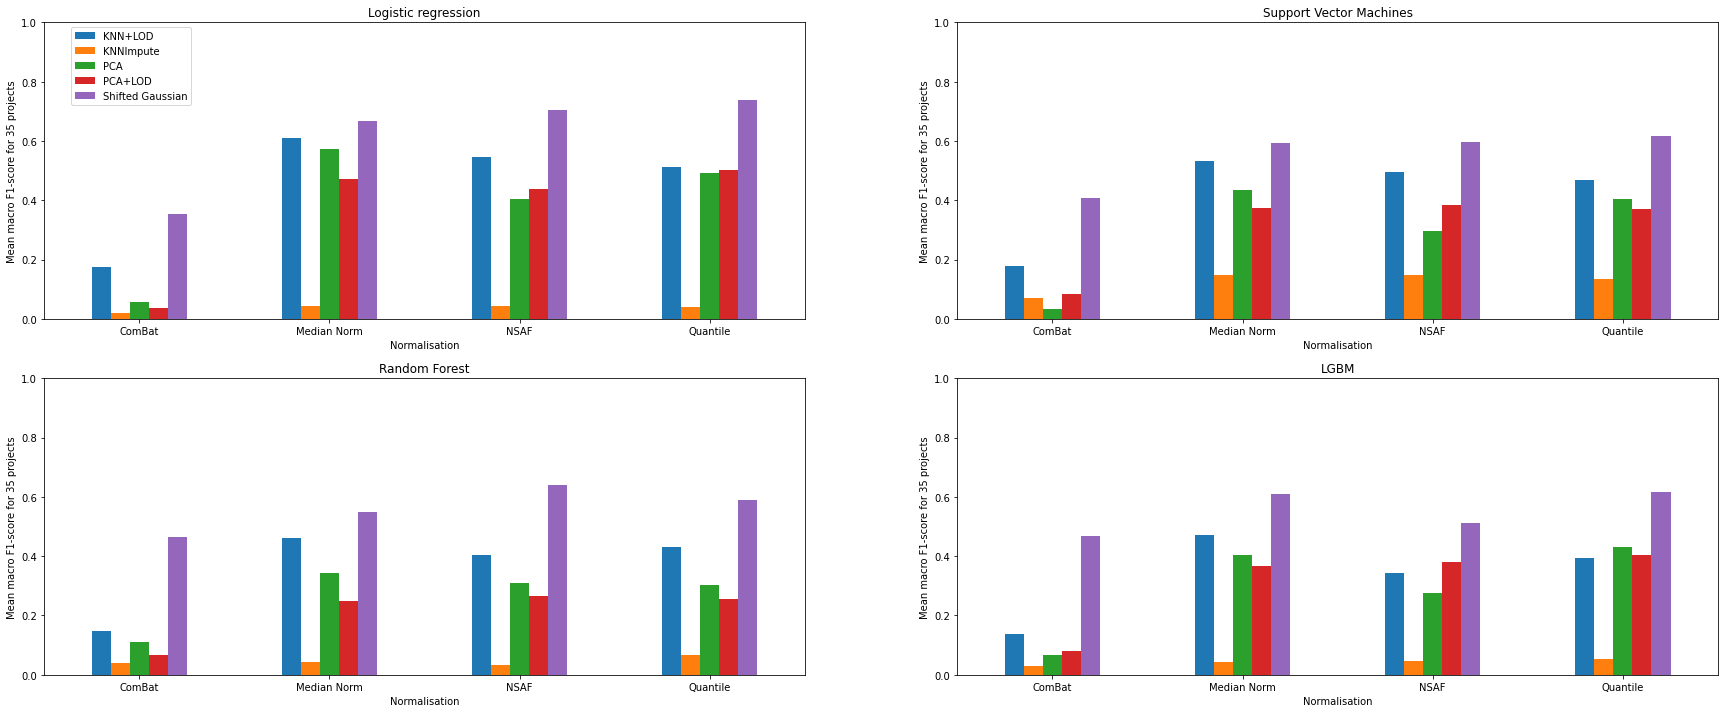

In [33]:
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(30,12))
g=norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar",  title="Performance after project split", ylim=(0,1), rot=0,
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",ax=ax1[0])
# For errorbars, add: ,yerr=norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", "Imputation"]).std().macro_f1.unstack(
g.legend(bbox_to_anchor=(.2, 1))
norm_impute_results[norm_impute_results.model == "SVC"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar",title="Performance after project split", ylim=(0,1),rot=0, order="KNN+LOD, PCA+LOD, SG, KNN, PCA".split(", "),
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",ax=ax1[1],legend=False)
norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar", title="Performance after project split", ylim=(0,1),rot=0,
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",ax=ax2[0], legend=False)
norm_impute_results[norm_impute_results.model == "LGBMClassifier"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar", title="Performance after project split", ylim=(0,1),rot=0,
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",ax=ax2[1], legend=False)

ax1[0].set_title("Logistic regression")
ax1[1].set_title("Support Vector Machines")
ax2[0].set_title("Random Forest")
ax2[1].set_title("LGBM")

<Figure size 720x360 with 0 Axes>

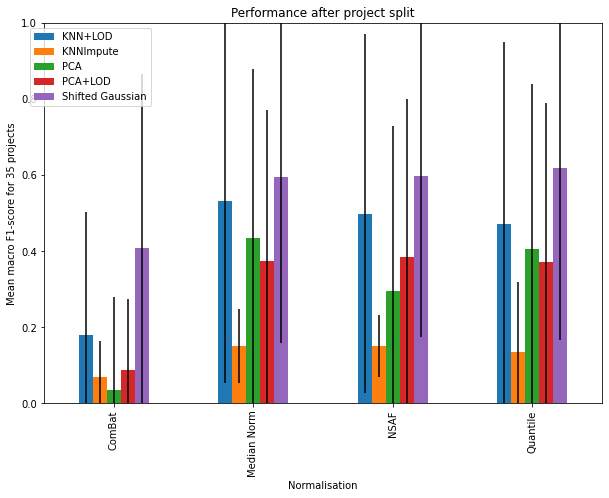

In [24]:
plt.figure(figsize=(10,5))
g=norm_impute_results[norm_impute_results.model == "SVC"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar", figsize=(10,7), title="Performance after project split", ylim=(0,1),
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",
                                                                                                                                                   yerr=norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", "Imputation"]).std().macro_f1.unstack())
g.legend(bbox_to_anchor=(.2, 1))

<Figure size 720x360 with 0 Axes>

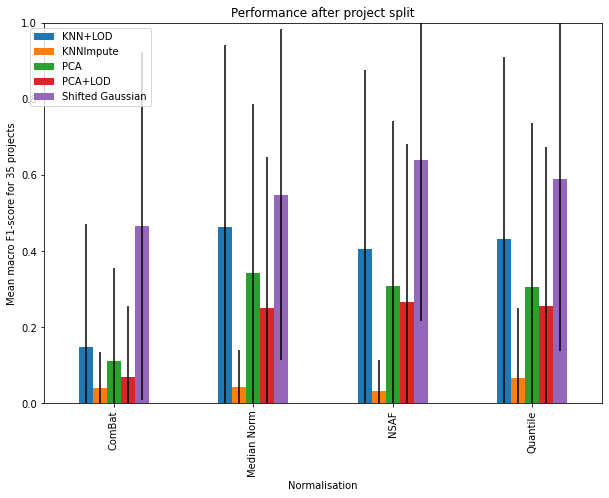

In [25]:
plt.figure(figsize=(10,5))
g=norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar", figsize=(10,7), title="Performance after project split", ylim=(0,1),
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",
                                                                                                                                                   yerr=norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", "Imputation"]).std().macro_f1.unstack())
g.legend(bbox_to_anchor=(.2, 1))

<Figure size 720x360 with 0 Axes>

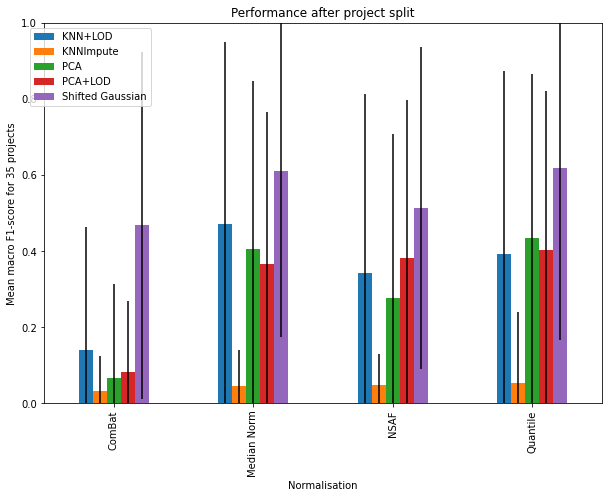

In [26]:
plt.figure(figsize=(10,5))
g=norm_impute_results[norm_impute_results.model == "LGBMClassifier"].groupby(["Normalization", "Imputation"]).mean().macro_f1.unstack().plot(kind="bar", figsize=(10,7), title="Performance after project split", ylim=(0,1),
                                                                                                                                                   ylabel="Mean macro F1-score for 35 projects", xlabel="Normalisation",
                                                                                                                                                   yerr=norm_impute_results[norm_impute_results.model == "RandomForestClassifier"].groupby(["Normalization", "Imputation"]).std().macro_f1.unstack())
g.legend(bbox_to_anchor=(.2, 1))

In [12]:
norm_impute_results[norm_impute_results.model == "LogisticRegression"].groupby(["Normalization", "Imputation"]).mean()

fold  micro_f1  macro_f1  weighted_f1
Normalization Imputation                                             
ComBat        KNN+LOD             18  0.175000  0.173656     0.178110
              KNNImpute           18  0.042619  0.019440     0.066807
              PCA                 18  0.057143  0.057143     0.057143
              PCA+LOD             18  0.042857  0.038095     0.047619
              Shifted Gaussian    18  0.401531  0.352926     0.437965
Median Norm   KNN+LOD             18  0.646406  0.609451     0.664675
              KNNImpute           18  0.098526  0.043399     0.128835
              PCA                 18  0.629909  0.572301     0.665778
              PCA+LOD             18  0.551791  0.473670     0.592782
              Shifted Gaussian    18  0.763356  0.667998     0.805568
NSAF          KNN+LOD             18  0.604466  0.545070     0.624154
              KNNImpute           18  0.103005  0.043063     0.134328
              PCA                 18  0.461234  0.404044     0.496352
              PCA+LOD             18  0.492324  0.437765     0.534498
              Shifted Gaussian    18  0.757517  0.703566     0.781487
Quantile      KNN+LOD             18  0.557573  0.511932     0.588156
              KNNImpute           18  0.086537  0.041532     0.114681
              PCA                 18  0.537619  0.492320     0.562812
              PCA+LOD             18  0.559001  0.502410     0.602378
              Shifted Gaussian    18  0.813866  0.739419     0.841546

In [14]:
norm_impute_results[norm_impute_results.model == "SVC"].groupby(["Normalization", "Imputation"]).mean()

fold  micro_f1  macro_f1  weighted_f1
Normalization Imputation                                             
ComBat        KNN+LOD             18  0.187619  0.178571     0.181429
              KNNImpute           18  0.082857  0.069662     0.080223
              PCA                 18  0.039048  0.033673     0.035556
              PCA+LOD             18  0.106667  0.085654     0.107695
              Shifted Gaussian    18  0.434048  0.407816     0.434833
Median Norm   KNN+LOD             18  0.570612  0.531728     0.594617
              KNNImpute           18  0.159048  0.149932     0.150748
              PCA                 18  0.452987  0.433382     0.448478
              PCA+LOD             18  0.405306  0.373144     0.422045
              Shifted Gaussian    18  0.630261  0.594122     0.652357
NSAF          KNN+LOD             18  0.512857  0.497388     0.519728
              KNNImpute           18  0.159048  0.149932     0.150748
              PCA                 18  0.322619  0.295661     0.328888
              PCA+LOD             18  0.405931  0.384300     0.413520
              Shifted Gaussian    18  0.620499  0.597524     0.638222
Quantile      KNN+LOD             18  0.494830  0.469533     0.504036
              KNNImpute           18  0.154286  0.134348     0.148151
              PCA                 18  0.417403  0.404226     0.421539
              PCA+LOD             18  0.398163  0.370905     0.414962
              Shifted Gaussian    18  0.635578  0.618299     0.647211

Grid search for model parameters

In [5]:
grid_search = pd.read_csv("grid_search_new.csv", sep=";")

In [19]:
import ast

In [16]:
param["best_params"]

"{'C': 94.15309233842581, 'class_weight': None, 'dual': False, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}"

In [21]:
ast.literal_eval(param["best_params"])

{'C': 94.15309233842581,
 'class_weight': None,
 'dual': False,
 'max_iter': 10000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [25]:
print("LR")
LR_params = []
SVC_params = []
RF_params = []
for i, param in grid_search[(grid_search.model == "LogisticRegression")]["macro_f1 best_params".split()].iterrows():
    d = ast.literal_eval(param["best_params"])
    d["f1_macro"] = param["macro_f1"]
    LR_params.append(d)

print("SVC")
for i, param in grid_search[(grid_search.model == "SVC")]["macro_f1 best_params".split()].iterrows():
    d = ast.literal_eval(param["best_params"])
    d["f1_macro"] = param["macro_f1"]
    SVC_params.append(d)

print("RF")
for i, param in grid_search[(grid_search.model == "RandomForestClassifier")]["macro_f1 best_params".split()].iterrows():
    d = ast.literal_eval(param["best_params"])
    d["f1_macro"] = param["macro_f1"]
    RF_params.append(d)

LR
SVC
RF


In [26]:
pd.DataFrame(LR_params)

,C,class_weight,dual,max_iter,penalty,solver,f1_macro
0,94.153092,None,False,10000,l2,liblinear,1.000000
1,68.236870,None,False,10000,l1,liblinear,0.958403
2,54.643923,None,False,10000,l2,liblinear,1.000000
3,21.484387,None,False,10000,l1,liblinear,0.977097
4,3.628825,None,False,10000,l2,liblinear,0.934747
5,85.871120,None,False,10000,l1,liblinear,0.942434
6,8.555875,None,False,10000,l2,liblinear,1.000000
7,56.288710,None,False,10000,l1,liblinear,1.000000
8,61.798814,None,False,10000,l2,liblinear,0.951183
9,33.103272,None,False,10000,l1,liblinear,0.951183


In [29]:
pd.DataFrame(LR_params).C.mean()

48.89882575937106

In [32]:
pd.DataFrame(LR_params).groupby("penalty").mean().f1_macro

penalty
l1    0.970865
l2    0.980334
Name: f1_macro, dtype: float64

In [27]:
pd.DataFrame(SVC_params)

,C,class_weight,decision_function_shape,kernel,f1_macro
0,27.636357,None,ovr,rbf,0.990967
1,34.737382,None,ovr,rbf,0.990967
2,4.239018,None,ovr,rbf,0.934747
3,9.345596,None,ovr,rbf,1.000000
4,7.721014,None,ovr,rbf,0.966667
5,6.236709,None,ovr,rbf,0.987119


In [30]:
pd.DataFrame(SVC_params).C.mean()

14.98601255513188

In [28]:
pd.DataFrame(RF_params)

,n_estimators,max_depth,criterion,class_weight,f1_macro
0,198,20,entropy,None,0.985166
1,134,15,entropy,None,0.959630
2,54,20,entropy,None,0.916291
3,121,10,entropy,None,0.994782
4,190,10,entropy,None,0.951183
5,123,15,entropy,None,0.935397


In [31]:
pd.DataFrame(RF_params).n_estimators.mean()

136.66666666666666

Project LOOCV on the optimised models

LR:
- L2, CV=50

SVC:
- C=15, kernel = rbf

RF:
- N_estimators = 150, criterion=entropy, max_depth = 10

# Generalisation of optimised models

In [3]:
project_gen = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_analysis/ML/results/project_split_eval.csv", sep=";")

In [24]:
project_gen.groupby(["model", "oversampler"]).mean().weighted_f1

model                   oversampler
LogisticRegression      SMOTE          0.937447
                        VAE            0.784071
RandomForestClassifier  SMOTE          0.817334
                        VAE            0.851667
SVC                     SMOTE          0.838180
                        VAE            0.845731
Name: weighted_f1, dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 720x360 with 0 Axes>

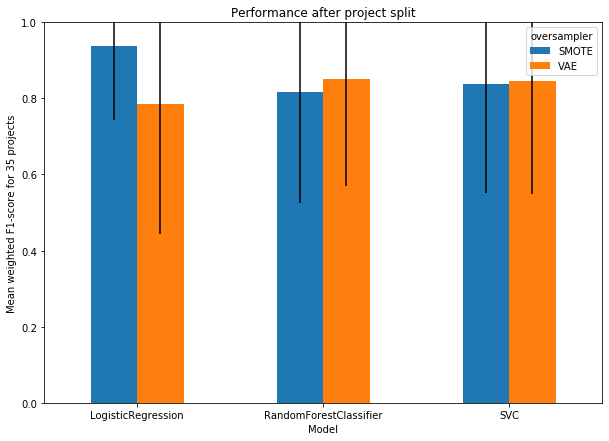

In [26]:
plt.figure(figsize=(10,5))
g=project_gen.groupby(["model", "oversampler"]).mean().weighted_f1.unstack().plot(kind="bar", figsize=(10,7), title="Performance after project split", ylim=(0,1),
 yerr=project_gen.groupby(["model", "oversampler"]).std().weighted_f1.unstack())

plt.xlabel(xlabel="Model")
plt.ylabel(ylabel="Mean weighted F1-score for 35 projects")
plt.xticks(rotation=0)

In [29]:
from scipy.stats import ttest_ind

ttest_ind(project_gen[(project_gen.model == "SVC") & (project_gen.oversampler == "VAE")].weighted_f1,
            project_gen[(project_gen.model == "SVC") & (project_gen.oversampler == "SMOTE")].weighted_f1)

Ttest_indResult(statistic=0.10857159501256963, pvalue=0.9138620315177355)

In [31]:
ttest_ind(project_gen[(project_gen.model == "LogisticRegression") & (project_gen.oversampler == "VAE")].weighted_f1,
            project_gen[(project_gen.model == "LogisticRegression") & (project_gen.oversampler == "SMOTE")].weighted_f1)

Ttest_indResult(statistic=-2.313191600907172, pvalue=0.023743591348667218)

In [30]:
ttest_ind(project_gen[(project_gen.model == "RandomForestClassifier") & (project_gen.oversampler == "VAE")].weighted_f1,
            project_gen[(project_gen.model == "RandomForestClassifier") & (project_gen.oversampler == "SMOTE")].weighted_f1)

Ttest_indResult(statistic=0.5006987702443659, pvalue=0.6181999530343361)

Which projects had wrong predictions? What were those predictions?

In [41]:
from sklearn.preprocessing import MinMaxScaler
print("Reading data...")
data_quantile = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_analysis/preprocessing/quantile_norm_NSAF_50.csv", index_col = "assay_id")
protein_columns = data_quantile.columns

with open("/home/compomics/Sam/git/python/master_thesis/Atlas_analysis/preprocessing/selected_features.txt", "r") as f:
    features = f.readlines()
    features = [x.strip() for x in features]
data_quantile = data_quantile.loc[:, features]
meta = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Metadata/unified_metadata.csv")
meta = meta[meta.assay_id.isin(data_quantile.index)]
groups = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Metadata/group_cells_annotation.csv", sep =";", index_col="Unnamed: 0")
meta["Group"] = meta.cell_line.apply(lambda x: groups[groups.cell_line == x]["group"].values[0])
meta = meta.set_index("assay_id")

data_quantile.sort_index(inplace=True)
meta.sort_index(inplace=True)
target_encoder = LabelEncoder()
targets = target_encoder.fit_transform(meta.Group)
unique_labels = pd.Series(targets).unique()

imputer = uml.LowestValueImputerGaussian()
imputed = imputer.fit_transform(data_quantile.to_numpy(), targets)
quant_scaler = MinMaxScaler()
scaled = quant_scaler.fit_transform(imputed)

splitter = uml.ProjectBasedSplit(0, meta, True, "Group")
for i,x in splitter.split(data_quantile, meta, n_projects=35):
    continue

Reading data...


In [13]:
fold_pxd = {i: splitter.taken_PXD[i-1] for i in range(1,36)}

In [16]:
project_gen["PXD_accession"] = project_gen.apply(lambda x: fold_pxd[x.fold], axis=1)

In [18]:
subset = project_gen[(project_gen.model == "LogisticRegression") & (project_gen.oversampler == "SMOTE")]

In [23]:
wrong_predictions = subset[subset.weighted_f1 < 1]
wrong_predictions

,model,fold,micro_f1,macro_f1,weighted_f1,cm,oversampler,PXD_accession
28,LogisticRegression,5,0.500000,0.044444,0.666667,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 ...,SMOTE,PXD006591
58,LogisticRegression,10,0.500000,0.100000,0.550000,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 ...,SMOTE,PXD001352
94,LogisticRegression,16,0.000000,0.000000,0.000000,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 ...,SMOTE,PXD009442
106,LogisticRegression,18,0.750000,0.057143,0.857143,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 ...,SMOTE,PXD003252
190,LogisticRegression,32,0.583333,0.049123,0.736842,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 ...,SMOTE,PXD003790


The case of PXD006591

<AxesSubplot:xlabel='0', ylabel='1'>

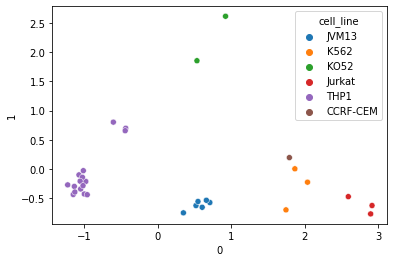

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pd.DataFrame(scaled)[(meta.reset_index().Group.isin(["Myeloid_leukemia", "Lymphoid_leukemia"])) & ~(meta.reset_index().PXD_accession == "PXD006591")])
embedding =pca.transform(pd.DataFrame(scaled)[meta.reset_index().Group.isin(["Myeloid_leukemia", "Lymphoid_leukemia"])])
sns.scatterplot(data=pd.DataFrame(embedding),x=0,y=1, hue=meta.reset_index()[meta.reset_index().Group.isin(["Myeloid_leukemia", "Lymphoid_leukemia"])].cell_line.reset_index(drop=True))

In [35]:
meta[meta.PXD_accession=="PXD006591"]

,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version,Group
assay_id,,,,,,,,,,,,,,,,,,,,
31278,1822,JVM-13_cyt_1a,558,JVM13,mantle cell lymphoma,/,blood,/,NaN,PXD006591,169829,36259,12300,2178,FASP,Q-exactive,29196338,0,IONBOT_v0.6.2,Lymphoid_leukemia
31279,1822,JVM-13_cyt_1b,558,JVM13,mantle cell lymphoma,/,blood,/,NaN,PXD006591,167070,36320,12316,2172,FASP,Q-exactive,29196338,0,IONBOT_v0.6.2,Lymphoid_leukemia
31280,1822,JVM-13_cyt_2a,558,JVM13,mantle cell lymphoma,/,blood,/,NaN,PXD006591,178416,40469,13735,2257,FASP,Q-exactive,29196338,0,IONBOT_v0.6.2,Lymphoid_leukemia
31281,1822,JVM-13_cyt_2b,558,JVM13,mantle cell lymphoma,/,blood,/,NaN,PXD006591,178591,42242,14347,2360,FASP,Q-exactive,29196338,0,IONBOT_v0.6.2,Lymphoid_leukemia
31282,1822,JVM-13_cyt_3a,558,JVM13,mantle cell lymphoma,/,blood,/,NaN,PXD006591,177263,39257,13410,2253,FASP,Q-exactive,29196338,0,IONBOT_v0.6.2,Lymphoid_leukemia
31283,1822,JVM-13_cyt_3b,558,JVM13,mantle cell lymphoma,/,blood,/,NaN,PXD006591,174395,40294,13503,2284,FASP,Q-exactive,29196338,0,IONBOT_v0.6.2,Lymphoid_leukemia


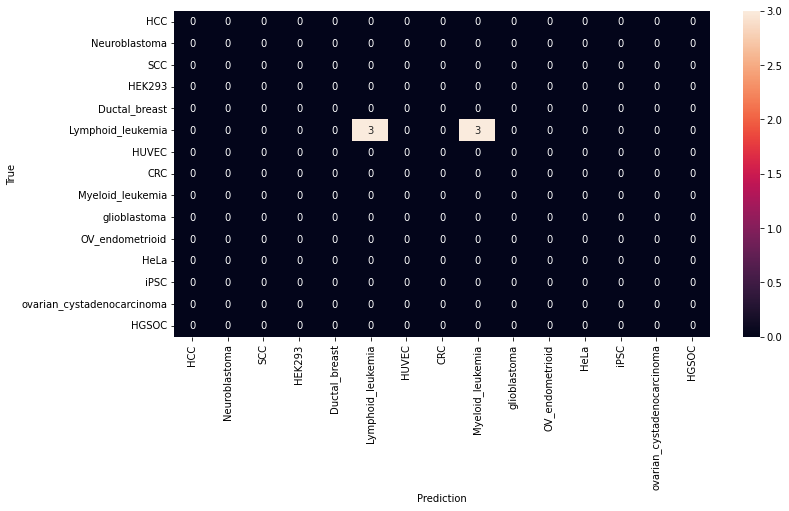

In [30]:
generate_cm(wrong_predictions.loc[28, "cm"])

The case of PXD001352

In [58]:
meta[meta.PXD_accession=="PXD001352"]

,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version,Group
assay_id,,,,,,,,,,,,,,,,,,,,
31350,1827,20121023_EXQ4_JRW_SA_30L_1,563,HCT116,carcinoma,/,colon,/,NaN,PXD001352,54155,50158,45310,4869,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,CRC
31351,1827,20121023_EXQ4_JRW_SA_30L_2,563,HCT116,carcinoma,/,colon,/,NaN,PXD001352,53578,49813,45029,4837,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,CRC
31352,1827,20121023_EXQ4_JRW_SA_30T_1,563,HCT116,carcinoma,/,colon,/,NaN,PXD001352,46575,41562,37168,5256,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,CRC
31353,1827,20140127_EXQ4_JRW_D52_1_L,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD001352,57119,53559,47775,4903,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,Ductal_breast
31354,1827,20140127_EXQ4_JRW_D52_1_T,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD001352,55718,49619,43721,5586,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,Ductal_breast
31355,1827,20140127_EXQ4_JRW_D52_2_L,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD001352,57190,53611,47886,4891,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,Ductal_breast
31356,1827,20140127_EXQ4_JRW_D52_2_T,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD001352,58739,51984,46037,5669,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,Ductal_breast
31357,1827,20140127_EXQ4_JRW_D61_1_L,564,K562,myeloid leukemia,/,blood,/,NaN,PXD001352,55965,50805,46112,5125,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,Myeloid_leukemia
31358,1827,20140127_EXQ4_JRW_D61_1_T,564,K562,myeloid leukemia,/,blood,/,NaN,PXD001352,56585,49740,44123,5559,FASP,Q-exactive,25475432,0,IONBOT_v0.8.0,Myeloid_leukemia


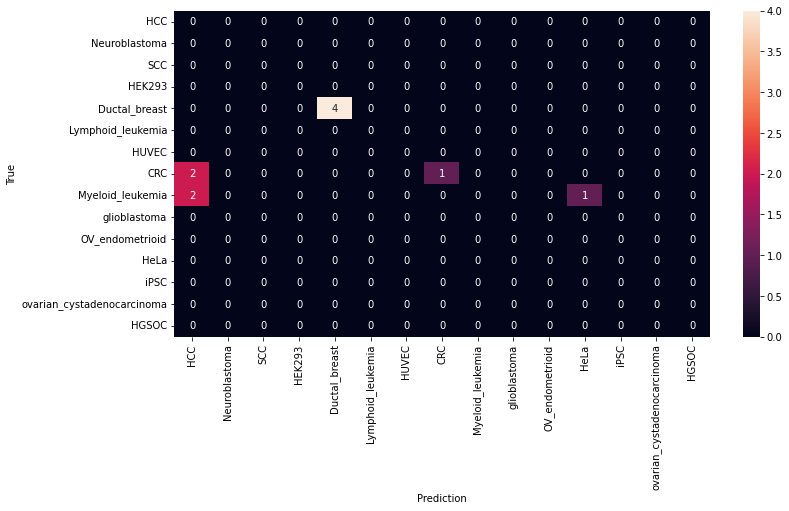

In [31]:
generate_cm(wrong_predictions.loc[58, "cm"])

The case of PXD009442

In [60]:
meta[meta.cell_line == "MDA-MB-231"]

,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version,Group
assay_id,,,,,,,,,,,,,,,,,,,,
31702,1836,MDA-MB-231_CC_control,580,MDA-MB-231,adenocarcinoma,/,breast,/,NaN,PXD009442,78050,14400,4872,1133,FASP,LTQ Orbitrap Elite,30373788,0,IONBOT_v0.6.2,Ductal_breast
31704,1836,MDA-MB-231_CC_Dox,579,MDA-MB-231,adenocarcinoma,/,breast,MDA-MB-231-R,NaN,PXD009442,72654,15434,5185,1119,FASP,LTQ Orbitrap Elite,30373788,0,IONBOT_v0.6.2,Ductal_breast
33072,1874,q01507,580,MDA-MB-231,adenocarcinoma,/,breast,/,NaN,PXD008222,86318,13724,4857,1431,in-solution,Q-exactive,28843283,1,IONBOT_v0.7.0,Ductal_breast
33092,1874,q01556,580,MDA-MB-231,adenocarcinoma,/,breast,/,NaN,PXD008222,99791,15632,5044,1351,in-solution,Q-exactive,28843283,5,IONBOT_v0.7.0,Ductal_breast


In [59]:
meta[meta.PXD_accession=="PXD009442"]

,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version,Group
assay_id,,,,,,,,,,,,,,,,,,,,
31702,1836,MDA-MB-231_CC_control,580,MDA-MB-231,adenocarcinoma,/,breast,/,NaN,PXD009442,78050,14400,4872,1133,FASP,LTQ Orbitrap Elite,30373788,0,IONBOT_v0.6.2,Ductal_breast
31704,1836,MDA-MB-231_CC_Dox,579,MDA-MB-231,adenocarcinoma,/,breast,MDA-MB-231-R,NaN,PXD009442,72654,15434,5185,1119,FASP,LTQ Orbitrap Elite,30373788,0,IONBOT_v0.6.2,Ductal_breast


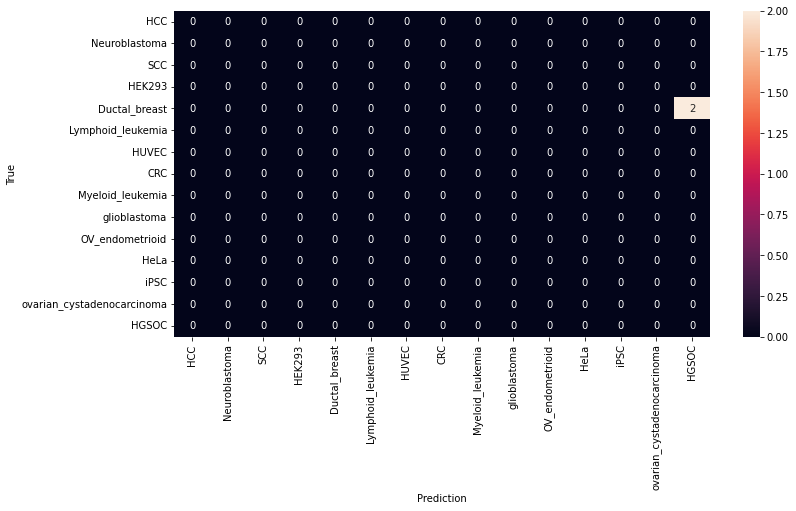

In [32]:
generate_cm(wrong_predictions.loc[94, "cm"])

The case of PXD003252

In [61]:
meta[meta.PXD_accession=="PXD003252"]

,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version,Group
assay_id,,,,,,,,,,,,,,,,,,,,
31730,1838,A2780-1,584,A2780,adenocarcinoma,/,ovary,/,NaN,PXD003252,95824,16669,5477,1220,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31731,1838,A2780-2,584,A2780,adenocarcinoma,/,ovary,/,NaN,PXD003252,93218,16271,5464,1257,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31732,1838,A2780-DR control-1,585,A2780,adenocarcinoma,/,ovary,A2780-DR,NaN,PXD003252,86566,13869,4591,1069,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31733,1838,A2780-DR control-2,585,A2780,adenocarcinoma,/,ovary,A2780-DR,NaN,PXD003252,86496,13364,4379,1026,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31734,1838,A2780-DR H19si-1,586,A2780,adenocarcinoma,/,ovary,A2780-DR H19KO,NaN,PXD003252,86215,13987,4698,1055,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31735,1838,A2780-DR H19si-2,586,A2780,adenocarcinoma,/,ovary,A2780-DR H19KO,NaN,PXD003252,95417,16583,5552,1228,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31736,1838,A2780-DR-1,585,A2780,adenocarcinoma,/,ovary,A2780-DR,NaN,PXD003252,93334,15568,5165,1171,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid
31737,1838,A2780-DR-2,585,A2780,adenocarcinoma,/,ovary,A2780-DR,NaN,PXD003252,92465,15493,5170,1193,in-solution,Q-exactive,27193186,0,IONBOT_v0.6.2,OV_endometrioid


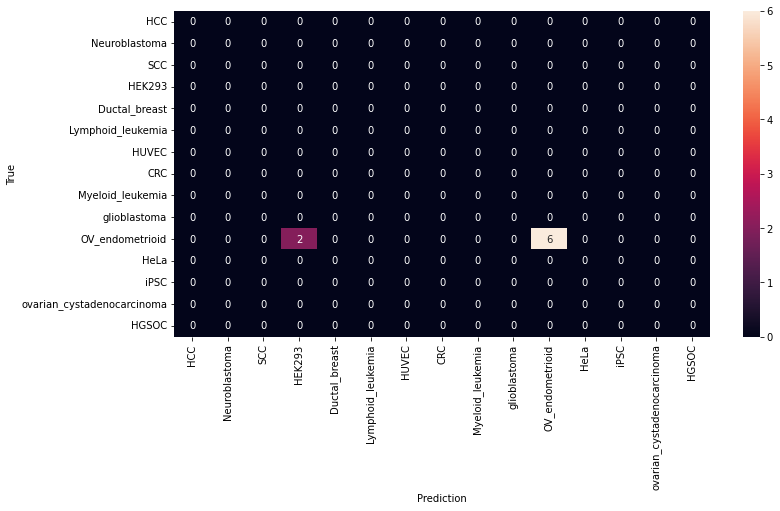

In [33]:
generate_cm(wrong_predictions.loc[106, "cm"])

The case of PXD003790

In [62]:
meta[meta.PXD_accession=="PXD003790"]

,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version,Group
assay_id,,,,,,,,,,,,,,,,,,,,
32440,1867,Seq45486_QE2,620,/,/,/,/,/,NaN,PXD003790,375764,59960,18197,2181,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32441,1867,Seq45487_QE2,620,/,/,/,/,/,NaN,PXD003790,373948,58936,17959,2177,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32442,1867,Seq45488_QE2,620,/,/,/,/,/,NaN,PXD003790,389864,62620,18820,2236,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32443,1867,Seq45489_QE2,620,/,/,/,/,/,NaN,PXD003790,388009,61735,18873,2359,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32444,1867,Seq45490_QE2,620,/,/,/,/,/,NaN,PXD003790,387321,62182,17570,2268,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32445,1867,Seq45491_QE2,620,/,/,/,/,/,NaN,PXD003790,380807,60788,17166,2207,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32446,1867,Seq45492_QE2,620,/,/,/,/,/,NaN,PXD003790,382287,61773,17721,2272,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32447,1867,Seq45493_QE2,620,/,/,/,/,/,NaN,PXD003790,384857,62271,17900,2296,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma
32448,1867,Seq45494_QE2,620,/,/,/,/,/,NaN,PXD003790,386253,62229,18127,2316,"in-gel, in-solution",Q-exactive,27412690,0,IONBOT_v0.7.0,glioblastoma


The study identified 7550 proteins... Article does not state to have selected only proteotypic peptides. My parser is doing something wrong?

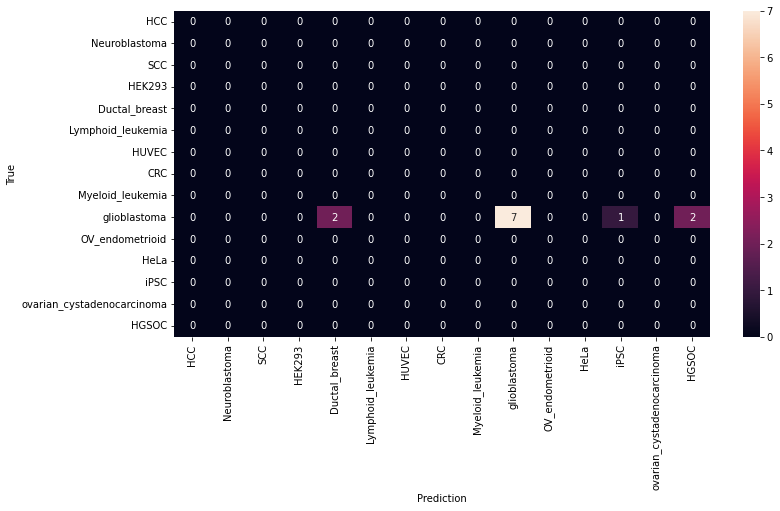

In [34]:
generate_cm(wrong_predictions.loc[190, "cm"])

---